In [ ]:
#pip install selenium

In [ ]:
#pip install webdriver-manager

In [1]:
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.common.by import By

In [45]:
#Install Driver
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|█████████████████| 8.61M/8.61M [00:00<00:00, 23.0MB/s]
/Users/stephaniefissel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


In [ ]:
#RYAN REYNOLDS

In [46]:
#Specify Search URL 
search_url="https://images.google.com/search?q={q}&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjc_M3T1Lv8AhUIFVkFHUQsAQcQ_AUoAXoECAEQAw&cshid=1673307742371070&biw=1200&bih=887" 

driver.get(search_url.format(q = 'Ryan Reynolds'))

In [23]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [24]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements(By.XPATH, "//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

In [48]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
#Iterate through each thumbnail and click it
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        #Make browser sleep for 2 seconds
        time.sleep(2)
        actual_images = driver.find_elements(By.CSS_SELECTOR, 'img.n3VNCb')
        #Find unique html tag corresponding to that image to locate it on page
        #Iterate through each result for taht image and extract 'src' attribute of it and see whether "https" is present in 'src'
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x000000010cfebf38 chromedriver + 4910904
1   chromedriver                        0x000000010cf6ba03 chromedriver + 4385283
2   chromedriver                        0x000000010cbb0747 chromedriver + 472903
3   chromedriver                        0x000000010cb86ff5 chromedriver + 303093
4   chromedriver                        0x000000010cc1fb0f chromedriver + 928527
5   chromedriver                        0x000000010cc35763 chromedriver + 1017699
6   chromedriver                        0x000000010cc1aee3 chromedriver + 909027
7   chromedriver                        0x000000010cbe530c chromedriver + 688908
8   chromedriver                        0x000000010cbe688e chromedriver + 694414
9   chromedriver                        0x000000010cfb91de chromedriver + 4702686
10  chromedriver                        0x000000010cfbdb19 chromedriver + 4721433
11  chromedriver                        0x000000010cfc528e chromedriver + 4752014
12  chromedriver                        0x000000010cfbe91a chromedriver + 4725018
13  chromedriver                        0x000000010cf92b02 chromedriver + 4545282
14  chromedriver                        0x000000010cfdd888 chromedriver + 4851848
15  chromedriver                        0x000000010cfdda05 chromedriver + 4852229
16  chromedriver                        0x000000010cff3e5f chromedriver + 4943455
17  libsystem_pthread.dylib             0x00007ff804951259 _pthread_start + 125
18  libsystem_pthread.dylib             0x00007ff80494cc7b thread_start + 15


In [26]:
#Download and save each image in Destination directory
os.chdir('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds')
baseDir=os.getcwd()

In [27]:
for i, url in enumerate(img_urls):
    file_name = f"{i:200}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_FN4Ar8BM_JRPEMzjJdl_ZuMBltLV8KaCPpYgONet6xPGEo0cT4oXOf2ETSYwRtAcCC4&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                       0.jpg
SAVED - https://www.nydailynews.com/resizer/w5ugfHbUTX-6SXojM286nRJt5g0=/3500x2333/filters:format(jpg):quality(70)/cloudfront-us-east-1.images.arcpublishing.com/tronc/XV3UZNGBINHQNDFIFOEVHMPZEU.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                       1.jpg
SAVED - htt

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0g-o8U6CAmV6R5aEt0otM234mA4yDCetZdg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                      20.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXCScfPtmoghWpX2DmRVJa2nB9bsE-YMIYcA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                      21.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREUhoLny7nNboqfrgeFozzrD0r3PQdCLNBZA&usqp=CAU - AT: /Users/stephaniefiss

SAVED - https://www.hiptoro.com/wp-content/uploads/2022/04/cea8d75ed0b220326147ba41c9.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                      41.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUXtLBp23RVVlfl5jo6NxTOZ2QXdyggv10dQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                      42.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnTlxqSesdyDsfKlhbjP3SWuW_jn5gDy0_Yw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile 

SAVED - https://media.cnn.com/api/v1/images/stellar/prod/230105105306-hugh-jackman-ryan-reynolds-file.jpg?c=original - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                      61.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPWeODj0ZIB_GwVVNzFyZ05Opmz8bVCetzEg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                      62.jpg
SAVED - https://media.vogue.fr/photos/5fad4fea39c5194ff9752f85/3:2/w_3479,h_2319,c_limit/GettyImages-675709556.jpg - AT: /Use

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyqTNySW6WWWpdWerv_QOcvgFK9R9q0EJzwg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                      83.jpg
SAVED - https://www.koimoi.com/wp-content/new-galleries/2022/10/scarlett-johansson-was-once-allegedly-bitter-against-blake-lively-for-stealing-ryan-reynolds-from-her-01.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                      84.jpg
SAVED - https://media.glamourmagazine.co.uk/photos/61388ef53bf019dd15

SAVED - https://media.architecturaldigest.com/photos/5d55a1c844da7f0008a60b57/master/pass/GettyImages-682109388.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     102.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3Qd6TTvCHZW4qLu1bA10dVXD1yBY5qVfWbQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     103.jpg
SAVED - https://metro.co.uk/wp-content/uploads/2022/10/SEC_128729241-6355.jpg?quality=90&strip=all - AT: /Users/stephaniefisse

SAVED - https://m.media-amazon.com/images/M/MV5BMWE2OWRlMDgtNzRhZi00ZjgzLTk4YzctMWFkMThkZTVkYTVmXkEyXkFqcGdeQXVyMTUzMTg2ODkz._V1_.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     122.jpg
SAVED - https://extra-images.akamaized.net/image/99/1by1/2021/11/04/9987e834edad41919615defdaad37937_xl.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     123.jpg
SAVED - https://www.brides.com/thmb/ffLKkT026SUW39EE9rcovYmD86Q=/1500x0/filters:no_upscale():max_bytes(15000

SAVED - https://s.yimg.com/ny/api/res/1.2/JYWr_lBiomvZ9pkchSFq9g--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTQ4MA--/https://media.zenfs.com/en/sheknows_79/4876cfb3a72a69f1b32376d7c4044f77 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     143.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR47P0u4lSF6ibtMDqhzR4rDRqd7DifN2II3Q&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     144.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9Gc

SAVED - https://m.media-amazon.com/images/M/MV5BODFmN2VmZmEtYTRjZi00ZjY1LTgxYjQtODMyNDI3ZDk4ZTJiXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     162.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYawoRgFebqd5IjQscKyhi_q03tGzahkW7Ew&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     163.jpg
SAVED - https://ca-times.brightspotcdn.com/dims4/default/b3c7683/2147483647/strip/true/crop/3500x2329+0+0/re

SAVED - https://www.looper.com/img/gallery/every-ryan-reynolds-movie-ranked-worst-to-best/l-intro-1644268725.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     182.jpg
SAVED - https://i.ytimg.com/vi/kOYS9lX2pgg/maxresdefault.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     183.jpg
SAVED - https://cdn.mos.cms.futurecdn.net/Uy4Yh2RyTKDLv8LiHvV4S5.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/r

SAVED - https://media.glamour.com/photos/63092bdb4ba00963da607e50/master/pass/1396416245 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     203.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuS4MBIA79dyiVouTRsGtFthK-UDxzkUxyhg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     204.jpg
SAVED - https://static1.colliderimages.com/wordpress/wp-content/uploads/2022/11/spirited-will-ferrell-ryan-reynolds-social-feature.jpg - AT: /Users/steph

SAVED - https://www.rollingstone.com/wp-content/uploads/2023/01/GettyImages-1373915616.jpg?w=1581&h=1054&crop=1 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     224.jpg
SAVED - https://img.huffingtonpost.com/asset/6374b0a12700006100d58159.jpeg?cache=ncWsr9Sudq&ops=scalefit_720_noupscale - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     225.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQDj3kAxmFMQ3wya13zTLRfVsQvcRFI-MD5Sg&usqp=CAU - AT: /User

SAVED - https://s.yimg.com/ny/api/res/1.2/1UcgtwGHCxgN4dcMNJve4Q--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTk2MA--/https://media.zenfs.com/en/marie_claire_us_340/1eaa6797ffda10143bdd3dabab07164c - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     243.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRS565s6c-GQtqU945QWJQ5I_p95Nc3rm-XnA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     244.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tb

SAVED - https://www.vmcdn.ca/f/files/via/images/people/ryan-reynolds-blake-lively-red-carpet.jpg;w=960 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     262.jpg
SAVED - https://hollywoodlife.com/wp-content/uploads/2022/08/blake-lively-ryan-reynolds-birthday-message-embed1.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     263.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjydl0QL0xNi79-_D5h2iG5NXmTnjdSXpwDcFfWkabiINc3WmN6easNMIPICLz7JPsETk

SAVED - https://www.nme.com/wp-content/uploads/2022/10/T-J-Miller-and-Ryan-Reynolds-696x442.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     281.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3nLMm-rnYnsyKopPlmpqYXr3w3n3eU8PTgg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     282.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTt8BQPlDWPZMM_dmmxyJ1q0HTdSrCkfLVJjg&usqp=CAU - AT: /Users/stephaniefissel/Library/M

SAVED - https://media1.popsugar-assets.com/files/thumbor/2oxJCgFE4ztFpWRKEo1RFpteoak/0x0:4685x4685/fit-in/2048xorig/filters:format_auto-!!-:strip_icc-!!-/2022/04/18/951/n/1922398/52f9abcb625ddcef18f315.55645869_/i/Blake-Lively-Ryan-Reynolds-Relationship-Timeline.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     303.jpg
SAVED - https://hollywoodlife.com/wp-content/uploads/2021/08/Ryan-Reynolds-blake-lively-marriage-shutter-embed.jpg?w=620 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                       

SAVED - https://variety.com/wp-content/uploads/2023/01/GettyImages-1374140450-e1672848834236.jpg?w=681&h=383&crop=1 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     321.jpg
SAVED - https://api.time.com/wp-content/uploads/2020/08/ryan-reynolds-blake-lively-plantation-wedding-regret.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     322.jpg
SAVED - https://techcrunch.com/wp-content/uploads/2021/09/ryan-reynolds.jpg?w=940&h=465&crop=1 - AT: /Users/stephaniefiss

SAVED - https://d.newsweek.com/en/full/1961364/betty-white-ryan-reynolds-split-pic.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     343.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLAI44BTrBsIvvxS7zpi8busAn7fJgUicL88_CdYVgZg0On_r_F1HEGcPbb5qu_6e_jw8&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     344.jpg
SAVED - https://img.buzzfeed.com/buzzfeed-static/static/2022-11/8/16/enhanced/82982cdf404a/original-918-1667924370-8.jpg -

SAVED - https://i.guim.co.uk/img/media/4289a1e98859929c16dfb48573bdaf66396b0eca/0_167_3500_2101/master/3500.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=ded6a189f880b07c23f654e4ddded33f - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     363.jpg
SAVED - https://media.gq.com/photos/58249cdda9546c3d5193215a/3:4/w_1500,h_2000,c_limit/1216-GQ-FERR02-01-Ryan-Reynolds-Deadpool-04.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     364.jpg
SAVED - https:

SAVED - https://pbs.twimg.com/ext_tw_video_thumb/1574865008198033409/pu/img/g687mJAxQ0-ad0PR?format=jpg&name=large - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     383.jpg
SAVED - https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F6%2F2011%2F06%2Fgettyimages-629251896-2000.jpg&q=60 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     384.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9Gc

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvgpWSiQ159Z-OoHESqNMyesQP2C32pULuMQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     401.jpg
SAVED - https://www.instyle.com/thmb/vxZC9GGdkpI0hAowrgwz3jrT0Ns=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/120716-Ryan-Reynolds-LEAD-2000-665fabe6164647af9ba659ab98a5c7ba.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/ryan_reynolds/                                                                                                                                                                                                     402.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?

In [ ]:
#HUGH JACKMAN

In [28]:
#Specify Search URL 
search_url="https://images.google.com/search?q={q}&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjc_M3T1Lv8AhUIFVkFHUQsAQcQ_AUoAXoECAEQAw&cshid=1673307742371070&biw=1200&bih=887" 

driver.get(search_url.format(q='Hugh Jackman'))

In [29]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [30]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements(By.XPATH, "//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

Message: element click intercepted: Element  is not clickable at point (92, 99). Other element would receive the click: <a href="/search?q=Hugh+Jackman&amp;tbm=isch&amp;chips=q:hugh+jackman,g_1:wolverine:DjabgP0WG08%3D&amp;bih=887&amp;biw=1200&amp;hl=en-US&amp;sa=X&amp;ved=2ahUKEwiajOXx57v8AhWpGVkFHY47DOUQ4lYoAHoECAEQIg" data-navigation="server" jslog="11106" aria-label="wolverine" class="ZZ7G7b A6Smgb">...</a>
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x0000000101c51f38 chromedriver + 4910904
1   chromedriver                        0x0000000101bd1a03 chromedriver + 4385283
2   chromedriver                        0x0000000101816747 chromedriver + 472903
3   chromedriver                        0x0000000101864588 chromedriver + 791944
4   chromedriver                        0x00000001018619ec chromedriver + 780780
5   chromedriver                        0x000000010185e671 chromedriver + 767601
6   chromedriver                        0x000
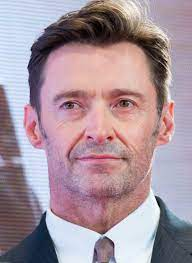

Message: element click intercepted: Element  is not clickable at point (257, 109). Other element would receive the click: <div class="qs41qe" style="overflow: hidden; height: 68px; margin-bottom: -10px;">...</div>
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x0000000101c51f38 chromedriver + 4910904
1   chromedriver                        0x0000000101bd1a03 chromedriver + 4385283
2   chromedriver                        0x0000000101816747 chromedriver + 472903
3   chromedriver                        0x0000000101864588 chromedriver + 791944
4   chromedriver                        0x00000001018619ec chromedriver + 780780
5   chromedriver                        0x000000010185e671 chromedriver + 767601
6   chromedriver                        0x000000010185d18b chromedriver + 762251
7   chromedriver                        0x000000010184dac3 chromedriver + 699075
8   chromedriver                        0x0000000101881112 chromedriver + 909586
9  
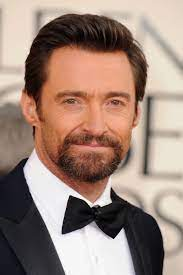

Message: element click intercepted: Element  is not clickable at point (471, 109). Other element would receive the click: <div class="qs41qe" style="overflow: hidden; height: 68px; margin-bottom: -10px;">...</div>
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x0000000101c51f38 chromedriver + 4910904
1   chromedriver                        0x0000000101bd1a03 chromedriver + 4385283
2   chromedriver                        0x0000000101816747 chromedriver + 472903
3   chromedriver                        0x0000000101864588 chromedriver + 791944
4   chromedriver                        0x00000001018619ec chromedriver + 780780
5   chromedriver                        0x000000010185e671 chromedriver + 767601
6   chromedriver                        0x000000010185d18b chromedriver + 762251
7   chromedriver                        0x000000010184dac3 chromedriver + 699075
8   chromedriver                        0x0000000101881112 chromedriver + 909586
9  
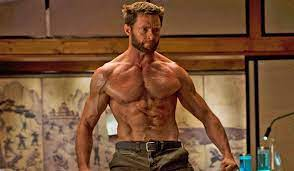

Message: element click intercepted: Element  is not clickable at point (693, 109). Other element would receive the click: <div class="qs41qe" style="overflow: hidden; height: 68px; margin-bottom: -10px;">...</div>
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x0000000101c51f38 chromedriver + 4910904
1   chromedriver                        0x0000000101bd1a03 chromedriver + 4385283
2   chromedriver                        0x0000000101816747 chromedriver + 472903
3   chromedriver                        0x0000000101864588 chromedriver + 791944
4   chromedriver                        0x00000001018619ec chromedriver + 780780
5   chromedriver                        0x000000010185e671 chromedriver + 767601
6   chromedriver                        0x000000010185d18b chromedriver + 762251
7   chromedriver                        0x000000010184dac3 chromedriver + 699075
8   chromedriver                        0x0000000101881112 chromedriver + 909586
9  
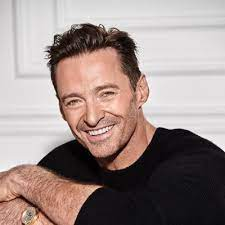

Message: element click intercepted: Element  is not clickable at point (919, 109). Other element would receive the click: <div class="qs41qe" style="overflow: hidden; height: 68px; margin-bottom: -10px;">...</div>
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x0000000101c51f38 chromedriver + 4910904
1   chromedriver                        0x0000000101bd1a03 chromedriver + 4385283
2   chromedriver                        0x0000000101816747 chromedriver + 472903
3   chromedriver                        0x0000000101864588 chromedriver + 791944
4   chromedriver                        0x00000001018619ec chromedriver + 780780
5   chromedriver                        0x000000010185e671 chromedriver + 767601
6   chromedriver                        0x000000010185d18b chromedriver + 762251
7   chromedriver                        0x000000010184dac3 chromedriver + 699075
8   chromedriver                        0x0000000101881112 chromedriver + 909586
9  
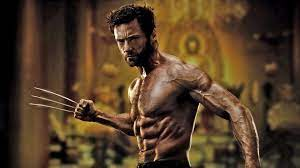

Message: element click intercepted: Element  is not clickable at point (1138, 109). Other element would receive the click: <div class="qs41qe" style="overflow: hidden; height: 68px; margin-bottom: -10px;">...</div>
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x0000000101c51f38 chromedriver + 4910904
1   chromedriver                        0x0000000101bd1a03 chromedriver + 4385283
2   chromedriver                        0x0000000101816747 chromedriver + 472903
3   chromedriver                        0x0000000101864588 chromedriver + 791944
4   chromedriver                        0x00000001018619ec chromedriver + 780780
5   chromedriver                        0x000000010185e671 chromedriver + 767601
6   chromedriver                        0x000000010185d18b chromedriver + 762251
7   chromedriver                        0x000000010184dac3 chromedriver + 699075
8   chromedriver                        0x0000000101881112 chromedriver + 909586
9 
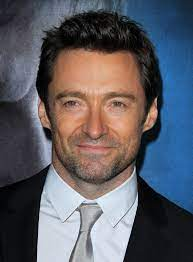

In [31]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
#Iterate through each thumbnail and click it
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        #Make browser sleep for 2 seconds
        time.sleep(2)
        actual_images = driver.find_elements(By.CSS_SELECTOR, 'img.n3VNCb')
        #Find unique html tag corresponding to that image to locate it on page
        #Iterate through each result for taht image and extract 'src' attribute of it and see whether "https" is present in 'src'
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [32]:
#Download and save each image in Destination directory
os.chdir('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman')
baseDir=os.getcwd()

In [33]:
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://s1.ticketm.net/dam/a/b9b/95ac95d8-37fe-4f57-ac46-f4767179eb9b_918751_TABLET_LANDSCAPE_LARGE_16_9.jpg?width=450&height=255&fit=crop&auto=webp - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                     0.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9VyPy8Tgro4xfo32Ky--II3gcSAZOsmkqpw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                     1.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7N9lqAG2lSOeJxnK11HX-l1SzVts1PoH7NA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facia

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVLYpBb2BIcC7N8LZrVdzDHRantGLZ4hqCPQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                    23.jpg
SAVED - https://i.pinimg.com/originals/a6/bc/2b/a6bc2b5a96ba7685a08795b6dcecae5d.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                    24.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwUtDZU-b1HgqpLwVewFw5Ced5l5k-5TR-Yw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                

SAVED - https://cdn.britannica.com/19/129219-004-EFA29632.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                    46.jpg
SAVED - https://media.self.com/photos/57d8990750778cef321a4b79/master/pass/GettyImages-508074226.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                    47.jpg
SAVED - https://static01.nyt.com/images/2022/02/06/arts/06MUSIC-MAN1/merlin_200988084_0541c1e3-bf90-4b75-bd65-34f54fc9a9d5-mobileMasterAt3x.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                          

SAVED - https://www.brides.com/thmb/ML0ymLza-0ILX82Uw89NcN452yc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-487686945-23676ae741404e88a6b54e0302f97b97.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                    68.jpg
SAVED - https://decider.com/wp-content/uploads/2018/08/oklahoma-exclamation-point.jpg?quality=75&strip=all - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                    69.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnTlxqSesdyDsfKlhbjP3SWuW_jn5gDy0_Yw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/c

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQP_B4YAaii6xoiCWWaMZWnHM55cMxQWHxAow&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                    91.jpg
SAVED - https://www.famousbirthdays.com/faces/jackman-hugh-image.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                    92.jpg
ERROR - COULD NOT SAVE https://i.discogs.com/caZ89uEHzQwoFhJenE-1ECExpinZtqwxhcMYJWpZdo4/rs:fit/g:sm/q:40/h:300/w:300/czM6Ly9kaXNjb2dz/LWRhdGFiYXNlLWlt/YWdlcy9BLTg0Mzcw/Ny0xNTg4NDY3Njgx/LTc0MTIucG5n.jpeg - cannot identify image file <_io.BytesIO object at 0x7fa985331570>
SAV

SAVED - https://prd-rteditorial.s3.us-west-2.amazonaws.com/wp-content/uploads/2018/11/07133828/Hugh-Jackman-Countdown-Rep.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   114.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTyzTgyL7Fcm9ulH03eBBZ-z10a-acwr4H2Q&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   115.jpg
SAVED - https://image-cdn.hypb.st/https%3A%2F%2Fhypebeast.com%2Fimage%2F2022%2F06%2Fhugh-jackman-reprising-his-role-as-wolverine-in-deadpool-3-00.jpg?w=960&cbr=1&q=90&fit=max - AT: /Users/stephaniefissel/Library/Mobile

SAVED - https://itsastampede615821596.files.wordpress.com/2022/05/list-of-hugh-jackman-movies.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   136.jpg
SAVED - https://hips.hearstapps.com/ame-prod-menshealth-assets.s3.amazonaws.com/main/assets/jackmain.jpg?resize=480:* - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   137.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYpIkc6bQ41SW4wNb-crITSicI4s7A4Df2RA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/         

SAVED - https://s7d2.scene7.com/is/image/TWCNews/whipple_reminiscencepkgcc41321187129111568 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   158.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTnZ965gurMJzxb6V0W0NBZ_HN7fBHU01gsQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   159.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxnvVaH9aqW0knC3CeQsXafh1yghKVHWctOQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                         

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqWDOy9-_gTPdDlIHTyiH2kQaAc4yz_qlrgQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   181.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCWO-Tj1CYyYD3xVAcLAPzdmR_HbaOHatg3EEFpmKXZBMPme50tflQwZ20t9Fi1cOw9B8&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   182.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqLjagW6fJq1OecVU6V0C7lyx17kfGEJQoRQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/tr

SAVED - https://static1.srcdn.com/wordpress/wp-content/uploads/2022/10/Split-image-of-Hugh-Jackman-in-Reminiscence-and-Logan-1.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   202.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmWUrVMkUzgy-UwRsJhX5b1-JOqmkD0lzS5Q&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   203.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSt9XtzEqlvTdH03wXLHi-tqkVYDVwFe_T7Sw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set

SAVED - https://images.thedirect.com/media/article_full/hugh-jackman-wolverine.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   224.jpg
SAVED - https://media-cldnry.s-nbcnews.com/image/upload/rockcms/2021-12/211225-Hugh-Jackman-al-1510-6dc80d.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   225.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCaEbMgBzcUev4BTEZe1E70HR5bV2mFaHEpdo1S2Mn_bqn0tRItWKDiBTqOlHUM2c0sw0&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackma

SAVED - https://static.foxnews.com/foxnews.com/content/uploads/2022/10/damon-jackman-split.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   246.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzWrU2E-yqO0z5LLMoDlRM62U_E6ViYq-Cyql08BWMeyeFBz-91xxjViBYFDzv5ozGbro&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   247.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQDcBFpq6J5tSm6X9nbKPqa0rrlYxs3vL4Jkg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hu

SAVED - https://static.foxnews.com/foxnews.com/content/uploads/2020/04/jackmanreynolds1.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   268.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvvIzNQ9H0xbl-KDPp2lqjpjM9D34Fhm48AA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   269.jpg
SAVED - https://i.pinimg.com/736x/62/5e/31/625e318227b97b4aa646243c00adcec1.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                     

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShnWs9sQ1pXIDy4XwWhbXIMpFPMFOjhobDMA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   289.jpg
SAVED - https://ca-times.brightspotcdn.com/dims4/default/fb02031/2147483647/strip/true/crop/2815x1877+0+0/resize/840x560!/quality/80/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2Ff2%2F85%2Fc2f270144950aa5381575dacaf66%2Fpremiere-x-men-origins-wolverine-la.JPEG - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   290.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ

SAVED - https://i.guim.co.uk/img/media/939644a90d5fe8940222dd74f283bc0750e8fad0/0_68_4905_2943/master/4905.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=10895e9b04af1034635e9ea981d4b9ff - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   310.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmyz_0p62Fi6a95yuzaIVIx2H28gmBa9xIIA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   311.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQz3o-cb6DgwNhavvRYKAAk6oQ5HFnvRmdIzQ&usqp=CAU - AT: /Users/stephaniefissel/Library

SAVED - https://seeded-session-images.scdn.co/v1/img/artist/5F1aoppMtU3OMiltO8ymJ2/en - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   332.jpg
SAVED - https://media-cldnry.s-nbcnews.com/image/upload/rockcms/2022-04/Hugh-Jackman-Deborra-Lee-Furness-te-220419-fa21d6.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   333.jpg
SAVED - https://media1.popsugar-assets.com/files/thumbor/uWqWOxOEZxRHkLvpjWovwGHMBxE/137x0:2756x2619/fit-in/2048xorig/filters:format_auto-!!-:strip_icc-!!-/2020/04/29/800/n/1922398/c9d9e1b35ea9c3702b5380.92652508_/i/ryan-reynolds-hugh-jackm

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5eVf2RAEYHa1ksNlk4JYri16lf7ZeYUBCNA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   354.jpg
SAVED - https://akns-images.eonline.com/eol_images/Entire_Site/20181012/rs_634x1024-181112125744-634-hugh-jackman-ivanka-trump-smile-me-111218.jpg?fit=around%7C634:1024&output-quality=90&crop=634:1024;center,top - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   355.jpg
SAVED - https://img.rasset.ie/001a57a5-1600.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial rec

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSd6dqaXn71ZBuOMLqYvPFiHhoFAw-UFKQ2hw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   377.jpg
SAVED - https://www.telegraph.co.uk/content/dam/news/2022/12/20/TELEMMGLPICT000320237876_trans_NvBQzQNjv4BqDiDrV97xgDFjc_F6AHtCzbRpwI5Tyvvrkv0uE14LTm0.jpeg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   378.jpg
ERROR - COULD NOT SAVE https://tomandlorenzo.com/wp-content/uploads/2022/10/Laura-Dern-Hugh-Jackman-The-Son-New-York-Screening-Style-Fashion-Tom-Lorenzo-Site-1.jpg - cannot identify image 

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSY89Ecy0hOUlg3Pw-vPMJZ7fmNqK68XQOXLggauSBPPmCjpsR68DddMZXlm4HLYW6wOfM&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   399.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSp2z7jvsjLxuXQzS7D0uGpBZAvGKXhiUpv6Q&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   400.jpg
SAVED - https://i.ytimg.com/vi/31QLF_i6Hto/maxresdefault.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                       

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdldMc4cj12rI-Xns9KK14mcufbwzPwy3gtg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   423.jpg
SAVED - https://vz.cnwimg.com/wp-content/uploads/2020/04/hj.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   424.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeo1ZWKaWN_X_Nkj5HaSJlF7z1Vbk66Zkt4Q&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                     

SAVED - https://images.hindustantimes.com/img/2022/11/24/550x309/wolverine_1669286445313_1669286448076_1669286448076.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   445.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuzqHmiTlkPUiTprQwltVUC3vUoXyhAxw5fQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   446.jpg
SAVED - https://images.hellomagazine.com/imagenes/homes/20221107156259/hugh-jackman-wife-deborra-new-york-apartment-video/0-759-788/hugh-jackman-home-t.jpg?tx=w_500 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~

SAVED - https://www.nzherald.co.nz/resizer/6ao8tqUUFssplhqMiO-TuQflt0I=/576x613/filters:focal(1490x1552:2066x2166)/cloudfront-ap-southeast-2.images.arcpublishing.com/nzme/SHSE7OCJ7NGOTC2D74J7F74DH4.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   466.jpg
SAVED - https://patch.com/img/cdn20/getty/23306266/20220902/103811/styles/patch_image/public/gettyimages-1419185326___02103715448.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   467.jpg
SAVED - https://media.glamourmagazine.co.uk/photos/6138c69ca8f6b78280dd9361/master/w_1600%2Cc_limit/Hugh-Jackman_gla

SAVED - https://nypost.com/wp-content/uploads/sites/2/2023/01/Hugh-Jackman-87.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   490.jpg
SAVED - https://akns-images.eonline.com/eol_images/Entire_Site/2016313/rs_634x1024-160413084431-634.Hugh-Jackman-St-Barts-JR-041316.jpg?fit=around%7C634:1024&output-quality=90&crop=634:1024;center,top - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   491.jpg
SAVED - https://static.wikia.nocookie.net/die-hard-scenario/images/3/31/Hugh_Jackman.jpg/revision/latest/scale-to-width-down/250?cb=20150211044957 - AT: /Users/stephanie

SAVED - https://akns-images.eonline.com/eol_images/Entire_Site/20121110/634.jackman.cm.121012_copy.jpg?fit=around%7C634:1024&output-quality=90&crop=634:1024;center,top - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   511.jpg
SAVED - https://images.mansionglobal.com//im-560963 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   512.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSn4JJ884r3TKdcL4t-JsMmWjRR8JezQAjpFGYLl-Anl5ylb58DoxOlEVJDIVHAzEsgZmQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognitio

SAVED - https://img.republicworld.com/republic-prod/stories/promolarge/xhdpi/szvhzgawcs9diw7f_1633710949.jpeg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   533.jpg
SAVED - https://i.ytimg.com/vi/sitlHxmrBoc/maxresdefault.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   534.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT1kUkcHuBr9f4BWogSTCe2zzRHK0E9J6Il-w&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                      

SAVED - https://media.cnn.com/api/v1/images/stellar/prod/160327042305-hugh-jackman.jpg?q=w_3000,h_2000,x_0,y_0,c_fill - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   554.jpg
SAVED - https://images.wsj.net/im-599573?width=700&height=466 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   555.jpg
SAVED - https://i.insider.com/612534d0493203001845ad1f?width=700 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                        

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYE3xT2jfnkNTvE78NRZRbB2HPN23YmErmYA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   577.jpg
SAVED - https://upload.wikimedia.org/wikipedia/commons/0/01/Hugh_Jackman_in_2019_%28cropped%29.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   578.jpg
SAVED - https://www.actorscentreaustralia.com.au/wp-content/uploads/2021/02/Gradfocus_HS_hugh-jackman1-min.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/               

SAVED - https://media.gq.com/photos/5be064e0f4319c483149bcb1/4:3/w_1232,h_924,c_limit/hugh-jackman-the-front-runner-interview-gq.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   600.jpg
SAVED - https://metro.co.uk/wp-content/uploads/2022/10/SEC_131171153-a388.jpg?quality=90&strip=all&zoom=1&resize=480%2C252 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   601.jpg
ERROR - COULD NOT SAVE https://heroichollywood.com/wp-content/uploads/2020/04/Wolverine-Hugh-Jackman-Deadpool-Ryan-Reynolds.jpg - cannot identify image file <_io.BytesIO object at 0x7fa985331620>


SAVED - https://akns-images.eonline.com/eol_images/Entire_Site/2020718/rs_1024x759-200818075120-1024-blake-hugh-ryan-gj-8-18-20.jpg?fit=around%7C1024:759&output-quality=90&crop=1024:759;center,top - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   622.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8k3mACM3msoGzWP0Fm-aXAxJKMY2L0jbqzw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   623.jpg
SAVED - https://media.vanityfair.com/photos/63b75704d6dfcc91b9ce4230/master/pass/reunited-hugh-and-darren.jpg - AT: /Users/stephaniefissel/Library/

SAVED - https://static01.nyt.com/images/2022/02/06/arts/02virus-briefing-music/02virus-briefing-music-mediumSquareAt3X-v2.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   643.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrMhvcUTeaWtTE8KRGUvSucDyIkTFaBaKLTgs8na05d127QonCWac4dw8QkFJQLYGEQAI&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   644.jpg
SAVED - https://cdn.fandomwire.com/wp-content/uploads/2022/11/13072417/mr-jackman-758x426.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognitio

SAVED - https://www.usmagazine.com/wp-content/uploads/2022/04/Everytime-Hugh-Jackman-and-Wife-Deborra-Lee-Furness-Have-Clapped-Back-at-Rumors-That-Hes-Gay8.jpg?w=1200&quality=74&strip=all - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   665.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTin7VrKf3HTu4BV7KSRDjWcl61vDEwq9RQeQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   666.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeu-jOqj_dFA-U3pmDjE1fqseDafYCYJDrbQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Docu

SAVED - https://www.joblo.com/wp-content/uploads/2022/10/hugh-jackman-deadpool.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   689.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9_gN3zklAQpOnh6w1OJAGZ6qgd07g6Nr8dw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   690.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-E_lvExN3Q6jQ9I0w7dO1tSwDLEb3Mfy0oA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                  

SAVED - https://www.joblo.com/wp-content/uploads/2022/10/deadpool-3-hugh-jackman-ryan-reynolds-reaction.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   711.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8tDzd6d2Sn-RZKQUTm1IYtYJabO5nbA2bYQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   712.jpg
SAVED - https://www.muscleandfitness.com/wp-content/uploads/2017/10/hugh-jackman-wolverine-1280.jpg?quality=86&strip=all - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jack

ERROR - COULD NOT SAVE https://heroichollywood.com/wp-content/uploads/2021/05/Taron-Egerton-Hugh-Jackman-Wolverine-MCU.jpg - cannot identify image file <_io.BytesIO object at 0x7fa99ef480a0>
SAVED - https://imgnew.outlookindia.com/public/uploads/articles/2021/8/25/official-trailer-reminiscence-starring-hugh-jackman_adobespark.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   734.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOaRKoArdKvvXYUzpmg-Fa2w6ZPljqlH63vg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/hugh_jackman/                                                                                                                                                   735.jpg
SAVED - http

In [ ]:
#JAKE GYLLENHAAL

In [39]:
#Specify Search URL 
search_url="https://images.google.com/search?q={q}&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjc_M3T1Lv8AhUIFVkFHUQsAQcQ_AUoAXoECAEQAw&cshid=1673307742371070&biw=1200&bih=887" 

driver.get(search_url.format(q='Jake Gyllenhaal'))

In [40]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [41]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements(By.XPATH, "//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="267" height="180" alt="Jake Gyllenhaal Had the Best Answer to a Question About Taylor Swift -  FASHION Magazine" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNzhHM_1N9rFZG1EI9p9eBRZVxiKCGWh7CNg&amp;usqp=CAU"> is not clickable at point (147, 90). Other element would receive the click: 
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x000000010cfebf38 chromedriver + 4910904
1   chromedriver                        0x000000010cf6ba03 chromedriver + 4385283
2   chromedriver                        0x000000010cbb0747 chromedriver + 472903
3   chromedriver                        0x000000010cbfe588 chromedriver + 791944
4   chromedriver                        0x000000010cbfb9ec chromedriver + 780780
5   chromedriver                        0x000000010cbf8671 chromedriver + 767601
6   chromedriver    
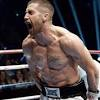

Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="297" height="170" alt="Jake Gyllenhaal reacts to Taylor Swift's 'All Too Well' after backlash from  singer's fans | Hollywood News" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRn2Y6D5VbpyK_AAlvDFyMxbTwbogmS0LTmzQ&amp;usqp=CAU"> is not clickable at point (597, 102). Other element would receive the click: <div class="qs41qe" style="overflow: hidden; height: 68px; margin-bottom: -10px;">...</div>
  (Session info: chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x000000010cfebf38 chromedriver + 4910904
1   chromedriver                        0x000000010cf6ba03 chromedriver + 4385283
2   chromedriver                        0x000000010cbb0747 chromedriver + 472903
3   chromedriver                        0x000000010cbfe588 chromedriver + 791944
4   chromedriver                        0x000000010cbfb9ec chromedriver

In [42]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
#Iterate through each thumbnail and click it
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        #Make browser sleep for 2 seconds
        time.sleep(2)
        actual_images = driver.find_elements(By.CSS_SELECTOR, 'img.n3VNCb')
        #Find unique html tag corresponding to that image to locate it on page
        #Iterate through each result for taht image and extract 'src' attribute of it and see whether "https" is present in 'src'
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [43]:
#Download and save each image in Destination directory
os.chdir('/Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal')
baseDir=os.getcwd()

In [44]:
for i, url in enumerate(img_urls):
    file_name = f"{i:150}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQ7Y2U9vI-HvKMq_VhwIn-_eXdl_gZzwR7ZA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                     0.jpg
ERROR - COULD NOT SAVE https://www.shefinds.com/files/2022/03/taylor-swift-jake-gyllenhaal.jpg - cannot identify image file <_io.BytesIO object at 0x7fa99eed4d58>
SAVED - https://www.tvinsider.com/wp-content/uploads/2022/12/jake-gyllenhaal-1014x570.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                     2.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRs3XrkT_KekC5OC8bdMucMW

SAVED - https://www.oxfordstudent.com/wp-content/uploads/2021/11/Defense-of-Gyllenhaal_nobanner-1.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                    22.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvVWAB9RQq0Tvi6FJNne_9WAJfcK0_GVv5BQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                    23.jpg
SAVED - https://i2-prod.mirror.co.uk/incoming/article24708313.ece/ALTERNATES/s1200b/0_MAIN-Jake-Gyllenhaal-outs-himself-as-latest-celebrity-to-turn-their-back-on-having-regular-baths.jpg - AT: /Users/stephaniefissel/Library/Mobile Docum

SAVED - https://thumbs.dreamstime.com/z/jake-gyllenhaal-los-angeles-premiere-prince-persia-sands-time-hollywood-california-united-states-may-77747049.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                    43.jpg
SAVED - https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/rockcms/2022-05/Jake-Gyllenhaal-te-220525-259c98.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                    44.jpg
SAVED - https://www.slashfilm.com/img/gallery/denis-villeneuve-pushed-jake-gyllenhaals-acting-to-the-verge-of-chaos-while-filming-enemy/intro-1671835755

SAVED - https://www.koimoi.com/wp-content/new-galleries/2021/08/jake-gyllenhaal-says-bathing-isnt-necessary-001.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                    64.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrP1ENGaWq3tg0ocLQtDdIEjcZfY4cZGLzKA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                    65.jpg
SAVED - https://e00-elmundo.uecdn.es/assets/multimedia/imagenes/2022/03/18/16475972561325.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/      

SAVED - https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F6%2F2022%2F02%2F17%2FJake-Gyllenhaal-Taylor-Swift.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                    86.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZjCg1EHcHl9Oavl81uXql7sLTbSnSQq8VjQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                    87.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT1jhTGAXj3tlgzu-pZUfvH0u0gDoyxXlJ2Kw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/c

SAVED - https://wwd.com/wp-content/uploads/2018/03/jake-gyllenhaal.jpg?w=1000&h=563&crop=1 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   107.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3T8Oqt9ZIe82TRAUqPONhdM_HkWPzZp3MaywxGI6oi0PJnEY2fMWFzfklVkLzfnwvpmc&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   108.jpg
SAVED - https://people.com/thmb/HJJffmE8ho-tqnzHAIeLiKz25lc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(552x224:554x226)/jake-gyllenhall-jeanne-cadieu-1-83dd69e3ef0b48999c0d1ba48f5965b0.jpg - A

SAVED - https://i.ytimg.com/vi/u-QsBvShKhE/maxresdefault.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   129.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSN_TKQVmTL4_KIqcoRDSlI17X442Y37hhjaA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   130.jpg
SAVED - https://static01.nyt.com/images/2015/09/12/arts/gyllenhaal/gyllenhaal-jumbo.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                   

SAVED - https://media.gq-magazine.co.uk/photos/6155885d10bc9baf7b761443/16:9/w_2560%2Cc_limit/GettyImages-1343033552.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   151.jpg
SAVED - https://pagesix.com/wp-content/uploads/sites/3/2015/07/565143595co054_siriusxm_s_t.jpg?quality=75&strip=all - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   152.jpg
SAVED - https://www.mensjournal.com/wp-content/uploads/mj-618_348_the-barefoot-running-hill-attacking-life-of-jake-gyllenhaal-the-fittest-guy-in-hollywood.jpg?quality=86&strip=all - AT: /Users/stephaniefissel/

SAVED - https://studybreaks.com/wp-content/uploads/2022/11/Gyllenhaal.jpg?ezimgfmt=rs:0x0/rscb6/ngcb6/notWebP - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   172.jpg
SAVED - https://i0.wp.com/nybreaking.com/wp-content/uploads/2022/12/Jake-Gyllenhaal-showcases-his-muscled-physique-in-clinging-top.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   173.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIt9ibdDhj9L1Py73-y3sHSZRqJj8neo314g&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/

SAVED - https://assets.goal.com/v3/assets/bltcc7a7ffd2fbf71f5/bltff81491299e4e5b3/623f1d3083d4d20ef03a2de8/Jake_Gyllenhaal_meets_Atletico_Madrid.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   194.jpg
SAVED - https://pbs.twimg.com/media/FiGa8OJWAAQFwii.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   195.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2QF9clFOhyzL3QFZnaPFw5I9klKEO4NFipA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/           

SAVED - https://www.dmarge.com/wp-content/uploads/2021/09/Jake-Gyllenhaal-white-outfit-1.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   218.jpg
SAVED - https://hollywoodlife.com/wp-content/uploads/2022/07/jake-gyllenhaal-girlfriends-ss-ftr.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   219.jpg
SAVED - https://www.joblo.com/wp-content/uploads/2022/01/jake-gyllenhaal-cut-and-run-speedboat-heist-movie-1280x720.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/           

SAVED - https://images.thedirect.com/media/article_full/jake-gyllenhaal-tom-holland-spiderman-far-from-home-mcu.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   239.jpg
SAVED - https://c8.alamy.com/comp/T4JYX0/los-angeles-ca-february-29-2004-actor-jake-gyllenhaal-at-party-at-warner-bros-studios-hollywood-for-rock-the-vote-T4JYX0.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   240.jpg
SAVED - https://s.yimg.com/ny/api/res/1.2/902hv8SNUIAJfpxZ4e9zbQ--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTQxNg--/https://media.zenfs.com/en/bang_showbiz_628/4559c15b424e

SAVED - https://people.com/thmb/yiFMRBK84bvojQx71H3dElebgdo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(749x0:751x2)/Jake-Gyllenhaal--cffae467212046c29ec0a8bc11936ce4.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   260.jpg
SAVED - https://media.gettyimages.com/id/1150365616/photo/actor-jake-gyllenhaal-poses-during-a-photocall-for-his-latest-film-spider-man-far-from-home.jpg?s=612x612&w=gi&k=20&c=bH2sN2JUkRb0dkwFl3ZrDDWGqyOG3y4xbw2wn822900= - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   261.jpg
SAVED - https://encrypted-tbn0.gs

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5iaNOdut0Q_53sD3gtCWGN_GEDqbDx-s79I00rG8gIKnX4RVqXz-xKIV-T2zu-dqsuu0&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   281.jpg
SAVED - https://i.guim.co.uk/img/static/sys-images/Guardian/About/General/2012/11/8/1352389364484/Jake-Gyllenhaal-Mike-and--010.jpg?width=465&quality=85&dpr=1&s=none - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   282.jpg
SAVED - https://c8.alamy.com/comp/G70BY2/star-of-the-film-jake-gyllenhaal-arrives-for-the-european-premiere-G70BY2.jpg - AT: /Users/stephan

SAVED - https://www.nickiswift.com/img/gallery/the-untold-truth-of-jake-gyllenhaal/intro-1644955439.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   302.jpg
SAVED - https://media.gq.com/photos/5a4bfde3c61be33c2c275388/3:4/w_972,h_1296,c_limit/Jake-Gyllenhaal-Hair-Journey.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   303.jpg
SAVED - https://images.complex.com/complex/images/c_fill,dpr_auto,f_auto,q_auto,w_1400/fl_lossy,pg_1/udzv5a7piaokvtlqbxvi/jake-and-taylor?fimg-ssr-default - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~Clou

SAVED - https://i.mydramalist.com/eOY3E_5_c.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   326.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAp1I8QBS4ZJ-pYviBqmEXrx8pha3jrwF5lpstTu6Sqr0MuGg7ityEWCAF834ZyxsG8eg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   327.jpg
SAVED - https://imaging.broadway.com/images/regular-43/w735/111178-15.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                             

SAVED - https://i2-prod.mirror.co.uk/incoming/article25450006.ece/ALTERNATES/s615b/1_JS250520431.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   348.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-OwaAeV7PqnBsSbkqUqZu_h-4FYJCaurj3w&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   349.jpg
SAVED - https://media.vogue.co.uk/photos/5ea82879374806000819d8ee/master/w_1600%2Cc_limit/JG_200227_CM_British_Vogue_NYC06C_1864_R5.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training

SAVED - https://akns-images.eonline.com/eol_images/Entire_Site/201979/rs_600x600-190809052727-600-Jake-Gyllenhaal-Jeanne-Cadieu-LT-080919-GettyImages-1166946627-GettyImages-1166889429.jpg?fit=around%7C700:700&output-quality=90&crop=700:700;center,top - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   369.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRo69hVodySDTOtfyhb7ZfyNZcybKobOfQQDg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   370.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmpc1sRuCHE7jZzaFSdUJ3eZi

SAVED - https://www.sheknows.com/wp-content/uploads/2021/11/jake-gyllenhaal-taylor-swift-reaction.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   392.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPCZyXJlG1QrFgD51XHxu2T1Sy9P4ZbTg3sw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   393.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuhOBMR8CyJo_NLnbsvatr83NfvB5f5LSvLw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/      

SAVED - https://www.refinery29.com/images/10986357.jpg?format=pjpg&auto=webp&resize-filter=lanczos2&quality=50&sharpen=a3%2Cr3%2Ct0&optimize=low&width=960 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   415.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIs9B4D-O0c646xO-U2bcstLyvzsU8ZchrCA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   416.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfN8rwGPLPChv1z6zvpC4bebyr9X4wVnqqlA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/f

SAVED - https://www.indiewire.com/wp-content/uploads/2013/11/prisoners.jpg?w=710 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   436.jpg
SAVED - https://static01.nyt.com/images/2019/08/15/fashion/13noregrets-slide-JO2C/13noregrets-slide-JO2C-videoSixteenByNine3000.jpg?year=2019&h=1687&w=3000&s=09631ba1b3ab3617fc393d03d5683fc75dc39294f0dd2b17b5fb61aac6cc6158&k=ZQJBKqZ0VN&tw=1 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   437.jpg
ERROR - COULD NOT SAVE https://www.heyalma.com/wp-content/uploads/2021/06/JakeGFinal.jpg - cannot identify image file <_io.B

SAVED - https://www.slashfilm.com/img/gallery/jake-gyllenhaal-came-up-with-the-sailing-duet-in-ambulance/l-intro-1649454731.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   457.jpg
SAVED - https://d26oc3sg82pgk3.cloudfront.net/files/media/edit/image/34419/large_thumb%402x.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   458.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLamlwUHPlKfDsK4WBDcpSuHmmDZTTi_sJjg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyl

SAVED - https://www.indiewire.com/wp-content/uploads/2021/09/AP21269850398653.jpg?w=780 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   479.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXdAtw6XewzbAM3MXe3LIPG8QJFVcadBhftw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   480.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3jtgo4F4fv1Hkj-onmtZO0pIt7HLhgUAaLQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                    

SAVED - https://images.bauerhosting.com/legacy/empire-images/articles/5935ab4570bca684744570ea/jake-gyllenhaal.jpg?format=jpg&quality=80&width=960&height=540&ratio=16-9&resize=aspectfill - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   501.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvfau2AcZ1KUdaE3HKv5KwbfPmYdO1Ce6Efw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   502.jpg
SAVED - https://metro.co.uk/wp-content/uploads/2022/11/SEI_133793570-17f3.jpg?quality=90&strip=all - AT: /Users/stephaniefissel/Library/Mobile Document

SAVED - https://www.billboard.com/wp-content/uploads/media/eminem-jake-gyllenhaal-southpaw-2015-billboard-650.jpg?w=650 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   524.jpg
SAVED - https://media.vanityfair.com/photos/570575f423f682a103b1c44c/master/pass/jake-gyllenhaal-crush.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   525.jpg
SAVED - https://www.indiewire.com/wp-content/uploads/2021/10/Screen-Shot-2021-10-08-at-10.32.36-AM.png - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gylle

SAVED - https://adabgmwwup.cloudimg.io/v7/_queerty-prodweb_/2022/11/jake-gyllenhaal-shutterstock-670.jpg?&auto=format&auto=compress&crop=faces&fit=crop&gravity=face&w=1200&h=630&force_format=jpeg&wat=1&wat_gravity=southeast&wat_pad=70 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   545.jpg
SAVED - https://images.entertainment.ie/storage/images_content/rectangle/620x372/Jake-Gyllenhaal-Talking-New-Yorker-Festival.jpg?w=1280&h=768&q=high - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   546.jpg
SAVED - https://images.csmonitor.com/csm/2015/07/923073_1_07-2

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRECEUpGZXy5QglTPsRBeW19nKaLnt7HjJ-1Q&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   568.jpg
SAVED - https://www.pajiba.com/assets_c/2022/08/Jake%20Gyllenhaal%20Getty%20Images%203-thumb-700xauto-247231.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   569.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTWSdCJkjLIFK0hsiOzfFue-M15Lpt_ypLCFw&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllen

SAVED - https://www.dailyactor.com/wp-content/uploads/2020/05/jake-gyllenhaal-actor.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   592.jpg
SAVED - https://images.anothermanmag.com/1050/azure/anotherman-prod/370/7/377942.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   593.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBRTAWArfGDQ9juDAkyOfqOu8L0hgBG9qHOA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                           

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-0FmMGjOXVSb0hOQjGZL86DXIN_iSdp8trQ&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   616.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQcRL_CNaErgvh6MxREij3g3H_de7t1wYR5Q&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   617.jpg
SAVED - https://assets.playbill.com/head-shots/Sea-Wall-A-Life-J.-Gyllenhaal-Cropped-1.png - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                 

SAVED - https://media.glamour.com/photos/6238e267b4c68fe0b02d0891/3:2/w_2274,h_1516,c_limit/1386763214.jpeg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   639.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTki0eYcF07DwU2S4DOfkRnWywg8wxIET-cxOJiAZ1b_vAfMgPI4qVZdOUsm5OLSWKiwVg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   640.jpg
SAVED - https://www.giantfreakinrobot.com/wp-content/uploads/2022/04/Jake-Gyllenhaal-900x506.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/trainin

SAVED - https://www.hollywoodreporter.com/wp-content/uploads/2022/12/Jake-Gyllenhaal-Strange-World-Getty-H-2022.jpg?w=1024 - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   662.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjqxaNz-Y4BsUTq3umTi8T0Cekw0BYtWMl_g&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   663.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8Aj1dgx2A4PkRxez2mzU7E8JBi11-uBJoBg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/j

SAVED - https://www.looper.com/img/gallery/fans-think-jake-gyllenhaal-completely-ruined-this-adventure-movie/l-intro-1657687477.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   685.jpg
SAVED - https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F6%2F2020%2F09%2F14%2FGettyImages-1158530923.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   686.jpg
SAVED - https://images.saymedia-content.com/.image/t_share/MTc0MzEyODQwNjA0NDI3Nzcy/jake-gyllenhaal.jpg - AT: /Users/stephaniefissel/Library/Mobi

SAVED - https://images2.minutemediacdn.com/image/fetch/c_fill,g_auto,f_auto,h_2237,w_3200/https%3A%2F%2Fhiddenremote.com%2Fwp-content%2Fuploads%2Fgetty-images%2F2018%2F08%2F1057530356.jpeg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   707.jpg
SAVED - https://www.indiependent.co.uk/wp-content/uploads/2022/12/jake-gyllenhaal1.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   708.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKRDiMTQiom6X7cvxawvUYcsy9fsBxzV59gA&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~appl

SAVED - https://d26oc3sg82pgk3.cloudfront.net/files/media/edit/image/33728/article_full%403x.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   727.jpg
SAVED - https://www.kveller.com/wp-content/uploads/2021/09/godmother.jpg - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   728.jpg
SAVED - https://64.media.tumblr.com/8cf8e5b9ae441abdcc3551598fec3ba3/a5c1d75f3eebec9e-d5/s540x810/8c7a7707da24cb16f903ecbed027a1ef7aa23577.png - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/           

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSctpMgp_GICYiWwmkL4ez1tW21WGO-sTgtp9XxmEz2Ktf_1h0OBCl6ZDsTIcZfNpI3Nao&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   747.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMW2a35vMO4YjOxgic5CGQRMOjxFTmnhrGYg&usqp=CAU - AT: /Users/stephaniefissel/Library/Mobile Documents/com~apple~CloudDocs/facial recognition/training_set/jake_gyllenhaal/                                                                                                                                                   748.jpg
